In [6]:
import torch
import sys
import os
sys.path.append('../vega/')
import vega
import scanpy as sc
import scvi
from scipy import sparse
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
path_to_save = '../paper/figures/extra_nodes/'
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = .5
matplotlib.rcParams['lines.linewidth'] = .5
matplotlib.rcParams['patch.linewidth'] = .5
matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
# Scanpy figures params
sc.set_figure_params(dpi_save=300)
sc.settings.figdir = path_to_save

In [2]:
dict_loss_train = {}
dict_loss_test = {}
dict_asw_cond = {}
dict_asw_ct_ctrl = {}
dict_asw_ct_stim = {}
dirpath = '../trained_models/node_experiment/'
list_dir = os.listdir(dirpath)
for d in list_dir:
    n = int(d.split('_')[0])
    dict_loss_train[n] = []
    dict_loss_test[n] = []
    dict_asw_cond[n] = []
    dict_asw_ct_ctrl[n] = []
    dict_asw_ct_stim[n] = []
    for k in range(5):
        model = vega.VEGA.load(dirpath+d+'/vega_%i_nodes_%i'%(n,k))
        X = model.to_latent(model.adata, return_mean = True)
        # Subset to only use pathway information and not the other nodes
        X = X[:,:-n]
        dict_asw_cond[n].append(silhouette_score(X, labels=model.adata.obs['condition']))
        dict_asw_ct_ctrl[n].append(silhouette_score(X[model.adata.obs['condition']=='control',:],
                                                    labels=model.adata.obs['cell_type'][model.adata.obs['condition']=='control']))
        dict_asw_ct_stim[n].append(silhouette_score(X[model.adata.obs['condition']=='stimulated',:],
                                                    labels=model.adata.obs['cell_type'][model.adata.obs['condition']=='stimulated']))
        dict_loss_train[n].append(np.min(model.epoch_history['train_loss']))
        dict_loss_test[n].append(np.min(model.epoch_history['valid_loss']))

Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder
Constraining decoder to positive weights
Model successfully loaded.
Using masked decoder


## Plot

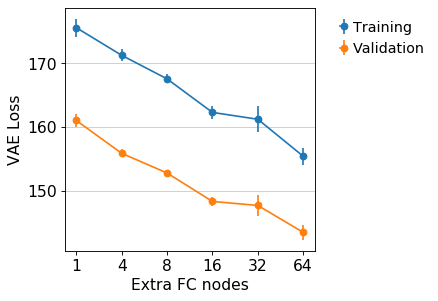

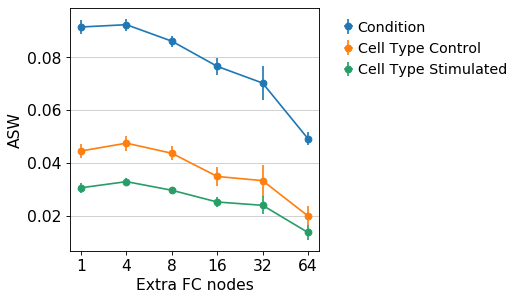

In [9]:
import matplotlib.pyplot as plt
x = []
y_train = []
y_std_train = []

y_test = []
y_std_test = []

y_asw_cond = []
y_std_asw_cond = []

y_asw_ct_ctrl = []
y_std_asw_ct_ctrl = []

y_asw_ct_stim = []
y_std_asw_ct_stim = []

for i in sorted(dict_loss_train.keys()):
    x.append(str(i))
    y_train.append(np.mean(dict_loss_train[i]))
    y_std_train.append(np.std(dict_loss_train[i]))
    
    y_test.append(np.mean(dict_loss_test[i]))
    y_std_test.append(np.std(dict_loss_test[i]))
    
    y_asw_cond.append(np.mean(dict_asw_cond[i]))
    y_std_asw_cond.append(np.std(dict_asw_cond[i]))
    
    y_asw_ct_ctrl.append(np.mean(dict_asw_ct_ctrl[i]))
    y_std_asw_ct_ctrl.append(np.std(dict_asw_ct_ctrl[i]))
    
    y_asw_ct_stim.append(np.mean(dict_asw_ct_stim[i]))
    y_std_asw_ct_stim.append(np.std(dict_asw_ct_stim[i]))
    
plt.errorbar(x, y_train, yerr=y_std_train, fmt='-o', label='Training')
plt.errorbar(x, y_test, yerr=y_std_test, fmt='-o', label='Validation')

plt.xlabel('Extra FC nodes')
plt.ylabel('VAE Loss')
plt.grid(axis='x')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.savefig(path_to_save+'loss_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

plt.errorbar(x, y_asw_cond, yerr=y_std_asw_cond, fmt='-o', label='Condition')
plt.errorbar(x, y_asw_ct_ctrl, yerr=y_std_asw_ct_ctrl, fmt='-o', label='Cell Type Control')
plt.errorbar(x, y_asw_ct_stim, yerr=y_std_asw_ct_stim, fmt='-o', label='Cell Type Stimulated')


plt.xlabel('Extra FC nodes')
plt.ylabel('ASW')
plt.grid(axis='x')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.savefig(path_to_save+'asw_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()